<a href="https://www.kaggle.com/code/ujayer/heart-disease-prediction-with-98-accuracy?scriptVersionId=237709127" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Data manipulation and numerical operations
import pandas as pd  # For handling datasets as DataFrames
import numpy as np   # For numerical operations and arrays

# Data visualization
import seaborn as sns              # For statistical visualizations
import matplotlib.pyplot as plt   # For basic plotting (e.g., line, bar, scatter plots)

# Data preprocessing and splitting
from sklearn.model_selection import train_test_split  # To split dataset into training and testing sets

# Classification models
from sklearn.ensemble import RandomForestClassifier         # Ensemble model using random decision trees
from sklearn.naive_bayes import GaussianNB                  # Naive Bayes classifier (for normally distributed features)
from sklearn.ensemble import GradientBoostingClassifier     # Ensemble boosting model for improved accuracy
from sklearn.neighbors import KNeighborsClassifier          # K-Nearest Neighbors classifier
from sklearn.linear_model import LogisticRegression         # Logistic regression model for binary classification
from sklearn.svm import SVC                                 # Support Vector Classifier for linear/nonlinear separation

# Feature scaling
from sklearn.preprocessing import StandardScaler            # Standardizes features by removing the mean and scaling to unit variance

# Evaluation metrics
from sklearn.metrics import recall_score                    # To measure recall (sensitivity) of classification
from sklearn.metrics import roc_curve, roc_auc_score        # To plot ROC curve and calculate AUC score for binary classifiers

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV            # Performs exhaustive search over specified parameter values for a model


In [2]:
# Load the heart disease dataset from a CSV file into a pandas DataFrame
df = pd.read_csv("../input/heart-disease-dataset/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
# Separate the dataset into features (X) and target variable (y)
X, y = df.drop("target", axis=1), df["target"]
# - X contains all columns except "target" (independent variables/features)
# - y contains only the "target" column (dependent variable indicating presence of heart disease)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
# - test_size=0.2 means 20% of the data is reserved for testing, 80% for training
# - random_state=9 ensures reproducibility; same split every time the code runs


In [4]:
# Initialize the Random Forest Classifier
forest = RandomForestClassifier(random_state=9)
# - random_state=9 ensures consistent results across runs (reproducibility)

# Train (fit) the model on the training data
forest.fit(X_train, y_train)
# - The model learns patterns from X_train to predict y_train (the target variable)


RandomForestClassifier(random_state=9)

In [5]:
# Initialize the Gaussian Naive Bayes classifier
nb_clf = GaussianNB()
# - This classifier assumes that features follow a Gaussian (normal) distribution
# - It is particularly effective for high-dimensional data with independence assumptions

# Train the Naive Bayes model on the training dataset
nb_clf.fit(X_train, y_train)
# - The model learns the statistical relationships between features and the target variable


GaussianNB()

In [6]:
# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()
# - Gradient Boosting builds an ensemble of weak learners (typically decision trees) in a sequential manner
# - Each new tree attempts to correct the errors made by the previous trees

# Train the Gradient Boosting model on the training data
gb_clf.fit(X_train, y_train)
# - The model is trained to minimize the loss function by combining the predictions of many weak learners


GradientBoostingClassifier()

In [7]:
# Initialize the StandardScaler for feature normalization
scaler = StandardScaler()
# - StandardScaler standardizes features by removing the mean and scaling to unit variance
# - This ensures that all features contribute equally to the model (important for algorithms like KNN, SVM, and Logistic Regression)

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
# - Calculates the mean and standard deviation from X_train
# - Applies the transformation: (value - mean) / standard deviation

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)
# - Uses the mean and standard deviation computed from the training data
# - Prevents data leakage by not fitting on test data


In [8]:
# Initialize the K-Nearest Neighbors (KNN) classifier
knn = KNeighborsClassifier()
# - KNN is a non-parametric, instance-based learning algorithm
# - It classifies a data point based on the majority class among its 'k' nearest neighbors

# Train the KNN model using the scaled training data
knn.fit(X_train_scaled, y_train)
# - The model stores the training data for use during prediction
# - Scaling is important here because KNN relies on distance calculations (e.g., Euclidean distance)


KNeighborsClassifier()

In [9]:
# Initialize the Logistic Regression classifier
log = LogisticRegression()
# - Logistic Regression is a linear model used for binary or multi-class classification
# - It models the probability that a given input belongs to a particular class using a logistic function

# Train the Logistic Regression model using the scaled training data
log.fit(X_train_scaled, y_train)
# - The model learns the weights (coefficients) for each feature to best fit the data
# - Scaling is important here to ensure that all features are on the same scale since Logistic Regression is sensitive to feature magnitude


LogisticRegression()

In [10]:
# Initialize the Support Vector Classifier (SVC)
svc = SVC()
# - SVC is a type of Support Vector Machine used for classification tasks
# - It aims to find the hyperplane that best separates the classes in the feature space

# Train the SVC model using the scaled training data
svc.fit(X_train_scaled, y_train)
# - The model identifies the optimal decision boundary (hyperplane) using the scaled features
# - Scaling is important for SVM, as it optimizes the margin and ensures equal contribution from all features


SVC()

In [11]:
# Evaluate the performance of the Random Forest Classifier on the test data
forest_score = forest.score(X_test, y_test)
# - This method computes the accuracy of the Random Forest model on the test set
# - Accuracy is the proportion of correct predictions out of all predictions made

# Evaluate the performance of the Naive Bayes classifier on the test data
nb_clf_score = nb_clf.score(X_test, y_test)
# - This computes the accuracy of the Naive Bayes model on the test data
# - It compares the predicted labels with the actual test labels

# Evaluate the performance of the Gradient Boosting Classifier on the test data
gb_clf_score = gb_clf.score(X_test, y_test)
# - This computes the accuracy of the Gradient Boosting model on the test set

# Evaluate the performance of the K-Nearest Neighbors classifier on the scaled test data
knn_score = knn.score(X_test_scaled, y_test)
# - This computes the accuracy of the KNN model on the scaled test data
# - Scaling is essential for KNN as it uses distance measures to classify points

# Evaluate the performance of the Logistic Regression classifier on the scaled test data
log_score = log.score(X_test_scaled, y_test)
# - This computes the accuracy of the Logistic Regression model on the scaled test set

# Evaluate the performance of the Support Vector Classifier on the scaled test data
svc_score = svc.score(X_test_scaled, y_test)
# - This computes the accuracy of the SVC model on the scaled test data

# Print the accuracy of each model
print("Random Forest Accuracy:", forest_score)
print("Naive Bayes Accuracy:", nb_clf_score)
print("Gradient Boosting Accuracy:", gb_clf_score)
print("KNN Accuracy:", knn_score)
print("Logistic Regression Accuracy:", log_score)
print("SVC Accuracy:", svc_score)

Random Forest Accuracy: 0.9853658536585366
Naive Bayes Accuracy: 0.8682926829268293
Gradient Boosting Accuracy: 0.9707317073170731
KNN Accuracy: 0.8634146341463415
Logistic Regression Accuracy: 0.8780487804878049
SVC Accuracy: 0.9317073170731708


In [12]:
# Predict the labels using the Random Forest classifier and calculate recall score
y_preds = forest.predict(X_test)
print("Forest:", recall_score(y_test, y_preds))
# - The `predict` method generates predictions on the test data
# - The `recall_score` computes the recall, which is the ability of the model to correctly identify positive instances
#   - Recall = True Positives / (True Positives + False Negatives)

# Predict the labels using the Naive Bayes classifier and calculate recall score
y_preds = nb_clf.predict(X_test)
print("NB:", recall_score(y_test, y_preds))
# - The same process as above for the Naive Bayes model

# Predict the labels using the Gradient Boosting classifier and calculate recall score
y_preds = gb_clf.predict(X_test)
print("GB:", recall_score(y_test, y_preds))
# - The same process as above for the Gradient Boosting model

# Predict the labels using the K-Nearest Neighbors classifier and calculate recall score
y_preds = knn.predict(X_test_scaled)
print("KNN:", recall_score(y_test, y_preds))
# - The same process as above for the KNN model
# - This time, predictions are made using scaled test data since KNN is sensitive to the feature scales

# Predict the labels using the Logistic Regression classifier and calculate recall score
y_preds = log.predict(X_test_scaled)
print("LOG:", recall_score(y_test, y_preds))
# - The same process as above for the Logistic Regression model
# - Predictions are based on the scaled test data

# Predict the labels using the Support Vector Classifier and calculate recall score
y_preds = svc.predict(X_test_scaled)
print("SVC:", recall_score(y_test, y_preds))
# - The same process as above for the Support Vector Classifier
# - Predictions are made using scaled test data since SVM models are sensitive to feature scaling


Forest: 0.9739130434782609
NB: 0.9043478260869565
GB: 0.9652173913043478
KNN: 0.8608695652173913
LOG: 0.9130434782608695
SVC: 0.9391304347826087


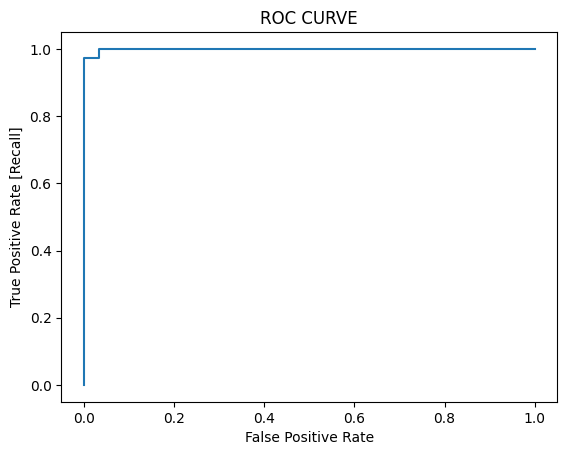

In [13]:
# Predict the probabilities of the positive class (class 1) using the Random Forest classifier
y_probs = forest.predict_proba(X_test)[:, 1]
# - The `predict_proba` method returns probabilities for both classes (0 and 1)
# - `[:, 1]` extracts the probabilities for the positive class (class 1)

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# - `roc_curve` computes the False Positive Rate (FPR) and True Positive Rate (TPR) at different thresholds
# - FPR is the ratio of false positives to the total actual negatives
# - TPR is the ratio of true positives to the total actual positives (same as recall)

# Plot the ROC curve using Matplotlib
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")  # Label for the x-axis
plt.ylabel("True Positive Rate [Recall]")  # Label for the y-axis
plt.title("ROC CURVE")  # Title of the plot
plt.show()  # Display the plot


In [14]:
# Calculate the AUC (Area Under the Curve) score for the ROC curve
auc_score = roc_auc_score(y_test, y_probs)
print("AUC Score:", auc_score)

AUC Score: 0.9991304347826087


In [15]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],  # Number of trees in the forest (ensemble)
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree (controls overfitting)
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider for the best split (sqrt/log2/all)
}

# Instantiate the RandomForestClassifier
forest = RandomForestClassifier(n_jobs=-1, random_state=9)
# - `n_jobs=-1`: Use all available CPU cores to speed up training
# - `random_state=9`: Ensures reproducibility of the results

# Create a GridSearchCV instance to search for the best combination of hyperparameters
grid_search = GridSearchCV(forest, param_grid, cv=3, n_jobs=-1, verbose=2)
# - `cv=3`: Use 3-fold cross-validation to evaluate each combination of hyperparameters
# - `n_jobs=-1`: Use all CPU cores for parallel computation
# - `verbose=2`: Provides detailed output of the grid search process


In [16]:
# Perform grid search to find the best hyperparameters for the RandomForest model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   2.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=9),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [17]:
# Retrieve the best estimator (model with the best hyperparameters) from the grid search
best_forest = grid_search.best_estimator_

# Display the best RandomForest model with the optimal hyperparameters
best_forest

RandomForestClassifier(max_features=None, n_estimators=200, n_jobs=-1,
                       random_state=9)

In [18]:
# Evaluate the accuracy of the best model (best_forest) on the test set
best_forest_score = best_forest.score(X_test, y_test)

# Display the accuracy of the best model on the test set
best_forest_score


0.9853658536585366

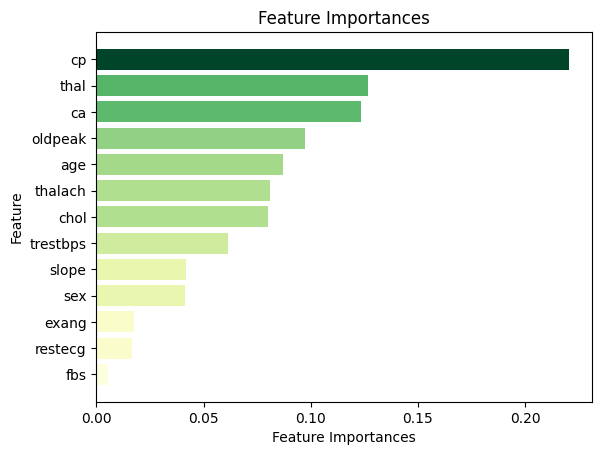

In [19]:
# Get the feature importances from the best RandomForest model
feature_importances = best_forest.feature_importances_

# Get the feature names used by the model
feature = best_forest.feature_names_in_

# Sort the features based on their importance in descending order
sorted_idx = np.argsort(feature_importances)

# Get the sorted feature names and their corresponding importances
sorted_features = feature[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Normalize the importances for color mapping in the plot
colors = plt.cm.YlGn(sorted_importances / max(sorted_importances))

# Plot the horizontal bar chart for feature importances
plt.barh(sorted_features, sorted_importances, color=colors)
plt.xlabel('Feature Importances')  # Label for the x-axis
plt.ylabel('Feature')  # Label for the y-axis
plt.title('Feature Importances')  # Title of the plot
plt.show()  # Display the plot

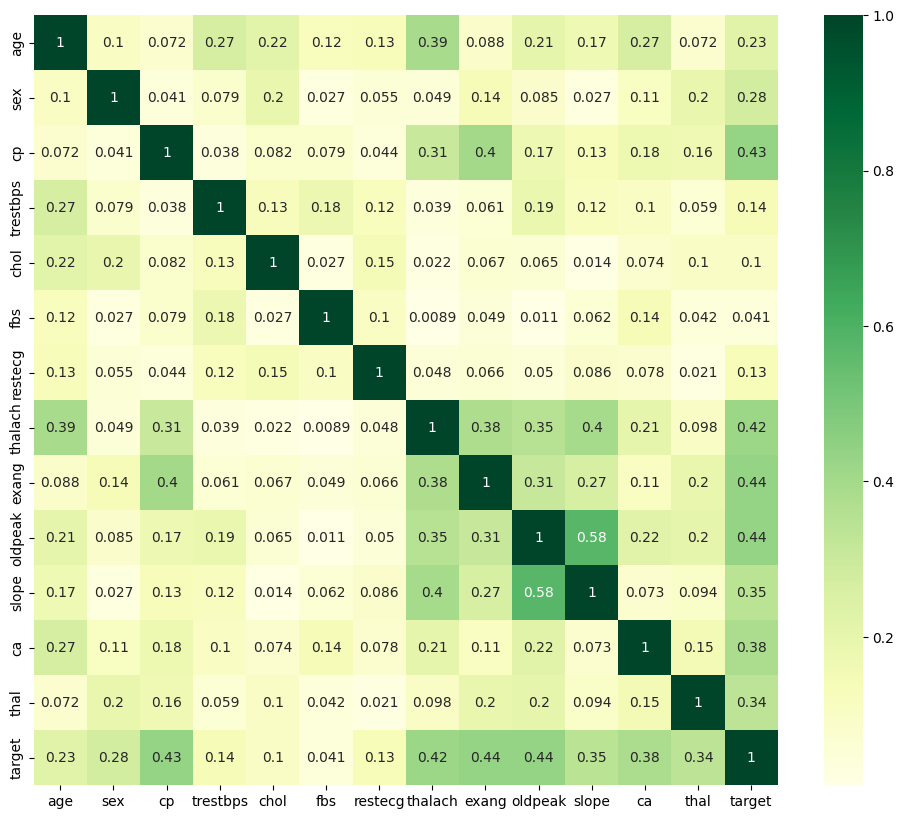

In [20]:
# Set the size of the plot
plt.figure(figsize=(12, 10))

# Create a heatmap to visualize the correlation matrix of the dataset
# `abs(df.corr())` calculates the absolute values of the correlation coefficients
# `annot=True` displays the correlation values on the heatmap
# `cmap='YlGn'` sets the color palette for the heatmap (Yellow-Green gradient)
sns.heatmap(abs(df.corr()), annot=True, cmap='YlGn')

# Display the heatmap
plt.show()

In [21]:
import numpy as np

# Input features (already scaled and reshaped)
# The values here represent the scaled features for a single patient. Each value corresponds to a specific feature 
# from the dataset, such as age, chest pain type, blood pressure, etc. These should match the scaled format used in 
# training the model.
X_input = np.array([0.3,  # age (scaled)
                    0.1,  # chest pain type
                    0.1,  # resting blood pressure
                    0.1,  # serum cholesterol
                    0.0,  # fasting blood sugar
                    0.0,  # resting ECG
                    0.1,  # max heart rate
                    0.0,  # exercise-induced angina
                    0.1,  # oldpeak
                    0.1,  # slope
                    0.0,  # number of major vessels
                    0.0,  # thal
                    0.0   # sex
                   ]).reshape(1, -1)  # Reshaping to make sure it's a 2D array (as required by the model)

try:
    # Get prediction probabilities from the model for the input data
    proba = best_forest.predict_proba(X_input)[0]  # Predict the probabilities for both classes
    prediction = best_forest.predict(X_input)[0]   # Predict the class (0 or 1)

    # Display the results: convert the prediction to "Yes" or "No" based on the predicted class
    print("Prediction:", "Yes" if prediction == 1 else "No")
    
    # Print the probability of having and not having heart disease
    print(f"Probability of Having Heart Disease: {proba[1] * 100:.2f}%")
    print(f"Probability of Not Having Heart Disease: {proba[0] * 100:.2f}%")

except Exception as e:
    # Catch any error that might occur during prediction and print the error message
    print("An error occurred during prediction:", str(e))

#If you are wondering, the error doesn't effect the code. It just tells the order of the input is not correct. This is just a warning, it doesn't harm the code by any way.

Prediction: No
Probability of Having Heart Disease: 26.00%
Probability of Not Having Heart Disease: 74.00%


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
